## Forecasting the Airlines Passengers data set

### IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
import statsmodels.formula.api as smf
import statsmodels.api as smf
from numpy import log

### IMPORTING DATA

In [16]:
airlines=pd.read_excel('data/Airlines+Data.xlsx')

In [17]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [18]:
airlines.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [19]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [20]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


## Line plot

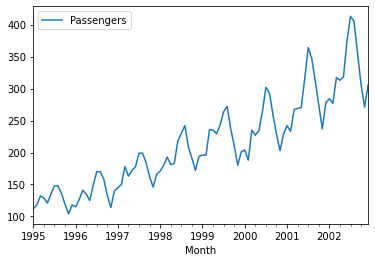

In [26]:
airlines1 =pd. read_excel("data/Airlines+Data.xlsx", header=0, index_col=0,parse_dates=True)
airlines1.plot()
pyplot.show()

In [27]:
airlines1

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


## Histogram and Density Plots

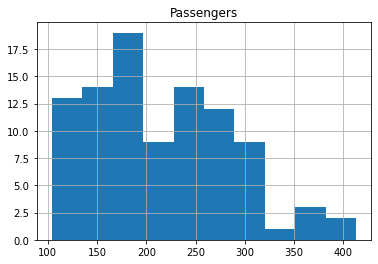

In [28]:
# create a histogram plot
airlines1.hist()
pyplot.show()

<AxesSubplot:ylabel='Density'>

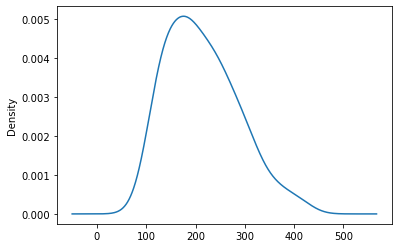

In [29]:
airlines1.Passengers.plot(kind='kde')

## Lag plot

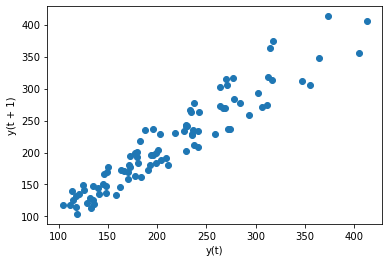

In [30]:
# create a scatter plot

from pandas.plotting import lag_plot

lag_plot(airlines1)
pyplot.show()

# ACF PLot

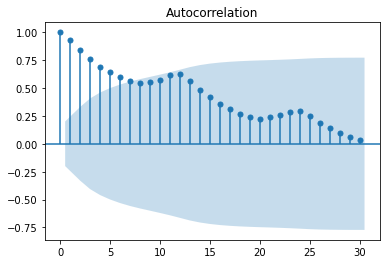

In [31]:
# create an autocorrelation plot

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(airlines1,lags=30)
pyplot.show()

## SquareTransformation

# Upsampling the data to each and every day

In [33]:
upsampled = airlines1.resample('D').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935
1995-01-11  113.935484
1995-01-12  114.129032
1995-01-13  114.322581
1995-01-14  114.516129
1995-01-15  114.709677
1995-01-16  114.903226
1995-01-17  115.096774
1995-01-18  115.290323
1995-01-19  115.483871
1995-01-20  115.677419
1995-01-21  115.870968
1995-01-22  116.064516
1995-01-23  116.258065
1995-01-24  116.451613
1995-01-25  116.645161
1995-01-26  116.838710
1995-01-27  117.032258
1995-01-28  117.225806
1995-01-29  117.419355
1995-01-30  117.612903
1995-01-31  117.806452
1995-02-01  118.000000


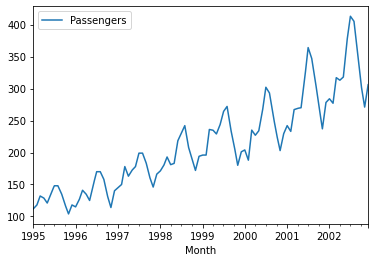

In [34]:
##### interpolate the missing value
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

# Before Transformation

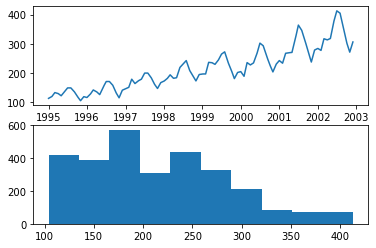

In [35]:
# line plot
pyplot.subplot(211)
pyplot.plot(interpolated)
# histogram
pyplot.subplot(212)
pyplot.hist(interpolated)
pyplot.show()

In [36]:
interpolated

,Passengers
Month,
1995-01-01,112.000000
1995-01-02,112.193548
1995-01-03,112.387097
1995-01-04,112.580645
1995-01-05,112.774194
...,...
2002-11-27,301.333333
2002-11-28,302.500000
2002-11-29,303.666667


# Square Root Transform

In [37]:
dataframe = DataFrame(interpolated)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

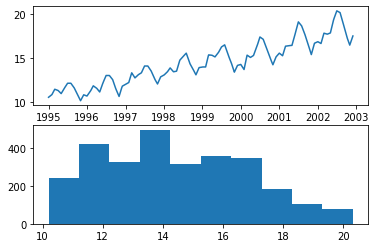

In [38]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

In [39]:
interpolated

,Passengers
Month,
1995-01-01,10.583005
1995-01-02,10.592146
1995-01-03,10.601278
1995-01-04,10.610403
1995-01-05,10.619519
...,...
2002-11-27,17.358955
2002-11-28,17.392527
2002-11-29,17.426034


# Log Transform

In [40]:
dataframe = DataFrame(interpolated)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

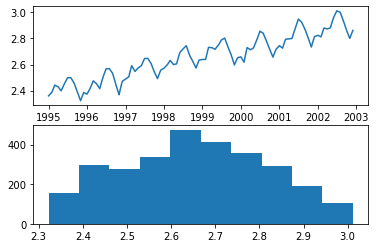

In [41]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

In [42]:
interpolated

,Passengers
Month,
1995-01-01,2.359249
1995-01-02,2.360113
1995-01-03,2.360975
1995-01-04,2.361835
1995-01-05,2.362694
...,...
2002-11-27,2.854109
2002-11-28,2.856041
2002-11-29,2.857965


In [43]:
interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2892 entries, 1995-01-01 to 2002-12-01
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  2892 non-null   float64
dtypes: float64(1)
memory usage: 45.2 KB


# Plotting Heatmap

In [45]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [46]:
airlines["Date"]=pd.to_datetime(airlines.Month,format="%b-%y")
airlines["Months"]=airlines.Date.dt.strftime("%b")
airlines["Year"]=airlines.Date.dt.strftime("%Y")

<AxesSubplot:xlabel='Month', ylabel='Year'>

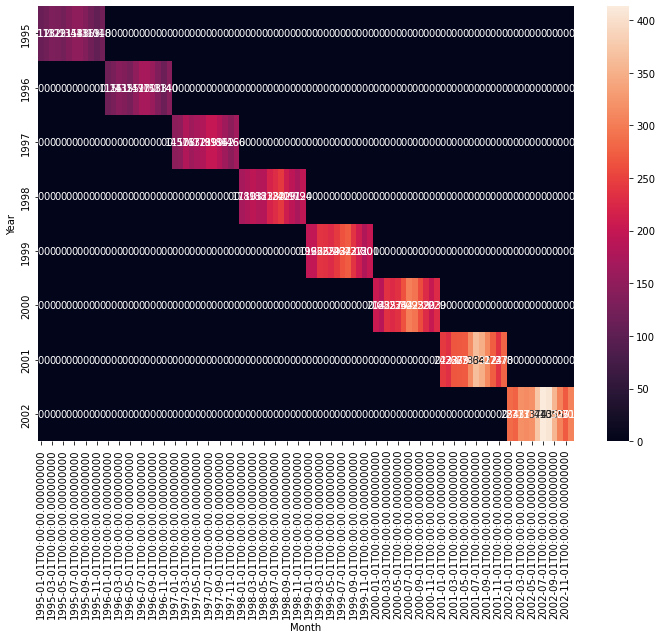

In [48]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airlines,values="Passengers",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='Months', ylabel='Passengers'>

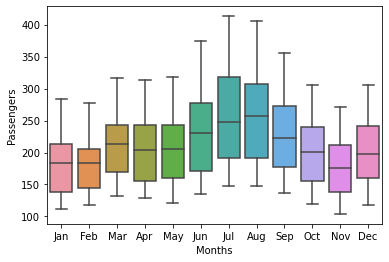

In [49]:
sns.boxplot(x="Months",y="Passengers",data=airlines)

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

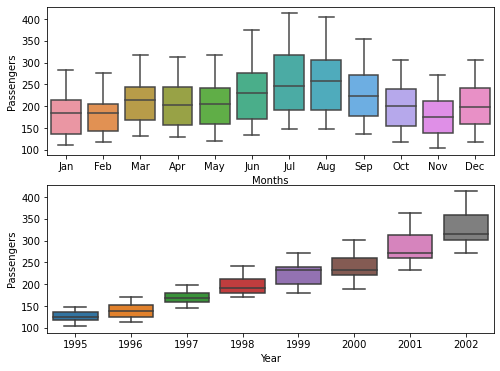

In [53]:
# Boxplot
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Months",y="Passengers",data=airlines)
plt.subplot(212)
sns.boxplot(x="Year",y="Passengers",data=airlines)

In [54]:
Month_Dummies = pd.DataFrame(pd.get_dummies(airlines['Months']))
airline1 = pd.concat([airlines,Month_Dummies],axis = 1)

In [55]:
airline1["t"] = np.arange(1,97)
airline1["t_squared"] = airline1["t"]*airline1["t"]
airline1["Log_Passengers"] = np.log(airline1["Passengers"])

In [56]:
airline1

,Month,Passengers,Date,Months,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<AxesSubplot:xlabel='Year', ylabel='Passengers'>

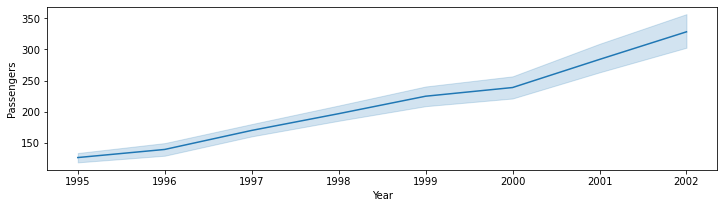

In [57]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=airlines)

# Moving Average

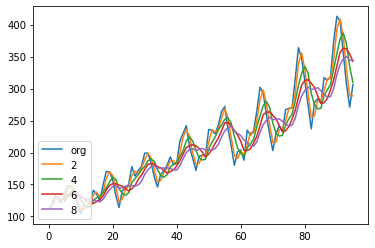

In [58]:
airlines.Passengers.plot(label="org")
for i in range(2,10,2):
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<AxesSubplot:>

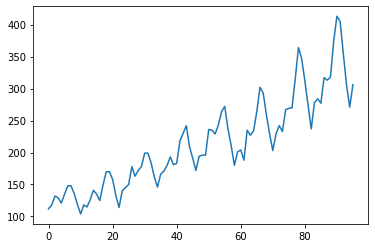

In [59]:
airlines.Passengers.plot()

C:\Users\HP\AppData\Local\Temp/ipykernel_17400/1651400394.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_ts_add=smf.tsa.seasonal_decompose(airlines["Passengers"],freq=10)


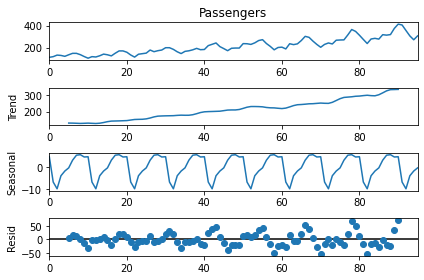

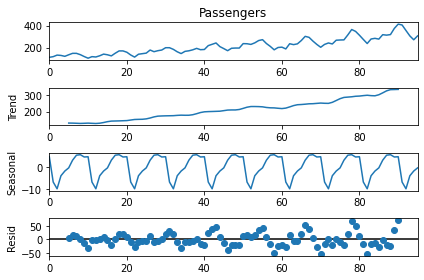

In [60]:
seasonal_ts_add=smf.tsa.seasonal_decompose(airlines["Passengers"],freq=10)
seasonal_ts_add.plot()

# Splitting data

In [61]:
Train = airline1.head(80)
Test = airline1.tail(16)

# Build Model & RMSE Value

In [62]:
# Linear Model
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.542624067726734

In [63]:
# Exponential Model
Exp = smf.ols('Log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334322

In [64]:
# Quadratic Model
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.6544036958425

In [65]:
# Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443307

In [66]:
# Additive Seasonality quadrative

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad=pd.Series(add_sea_Quad.predict(Test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570106755

In [67]:
#Multiplicative Seasonality

Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621102

In [68]:
#Multiplicative addditive seasonality

Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

9.469000230304077

# TESTING

In [69]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,47.542624
1,rmse_Exp,43.793739
2,rmse_Quad,43.654404
3,rmse_add_sea,129.266476
4,rmse_add_sea_quad,23.910984
5,rmse_Mult_sea,135.326484
6,rmse_Mult_add_sea,9.469000


# PREDICT WITH NEW DATA

In [70]:
t = np.arange(97,108)
t

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107])

In [71]:
t_squared=np.array(t*t)
t_squared

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449])

In [72]:
Month = pd.DataFrame({'Month':['2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01',
                               '2003-08-01','2003-09-01','2003-10-01','2003-10-01']})

In [73]:
df={'t':t,'t_squared':t_squared}
df=pd.DataFrame(df)

In [74]:
newdata = pd.concat([Month,df],axis=1)
newdata

,Month,t,t_squared
0,2003-01-01,97,9409
1,2003-02-01,98,9604
2,2003-03-01,99,9801
3,2003-04-01,100,10000
4,2003-05-01,101,10201
5,2003-06-01,102,10404
6,2003-07-01,103,10609
7,2003-08-01,104,10816
8,2003-09-01,105,11025
9,2003-10-01,106,11236


# Build the model on entire dataset

In [75]:
model_full = smf.ols('Passengers~t',data=airline1).fit()
pred_new  = pd.Series(model_full.predict(newdata))
pred_new

0     326.941886
1     329.276598
2     331.611311
3     333.946023
4     336.280736
5     338.615448
6     340.950161
7     343.284873
8     345.619585
9     347.954298
10    350.289010
dtype: float64

In [76]:
newdata["forecasted_passengers"]=pd.Series(pred_new)

In [77]:
newdata

,Month,t,t_squared,forecasted_passengers
0,2003-01-01,97,9409,326.941886
1,2003-02-01,98,9604,329.276598
2,2003-03-01,99,9801,331.611311
3,2003-04-01,100,10000,333.946023
4,2003-05-01,101,10201,336.280736
5,2003-06-01,102,10404,338.615448
6,2003-07-01,103,10609,340.950161
7,2003-08-01,104,10816,343.284873
8,2003-09-01,105,11025,345.619585
9,2003-10-01,106,11236,347.954298


### OBSERVATION:

##### Multiplicative Additive Seasonality gives the best prediction of least RMSE of 9.42